<a href="https://colab.research.google.com/github/harshalkumeriya/Deep-Learning-using-Tensorflow/blob/master/ANN_Regressor_(housing)_using_keras_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

In [4]:
df = fetch_california_housing()


In [5]:
X_train_full, X_test, y_train_full, y_test = train_test_split(df.data, df.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [7]:
X_train_full.shape

(15480, 8)

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [17]:
# Using Sequential API

In [14]:
model = keras.models.Sequential([keras.layers.Dense(30, activation = "relu", input_shape = X_train.shape[1:]), keras.layers.Dense(1)])
model.compile(loss = "mean_squared_error", optimizer = "sgd")
history = model.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs = 100, use_multiprocessing = True)

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 1.3199 - val_loss: 0.5266
Epoch 2/100
363/363 [==============================] - 1s 1ms/step - loss: 0.5632 - val_loss: 0.4949
Epoch 3/100
363/363 [==============================] - 1s 1ms/step - loss: 0.7894 - val_loss: 0.4956
Epoch 4/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4594 - val_loss: 0.4968
Epoch 5/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4447 - val_loss: 0.4121
Epoch 6/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4017 - val_loss: 0.4014
Epoch 7/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3930 - val_loss: 0.3927
Epoch 8/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3883 - val_loss: 0.3830
Epoch 9/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3827 - val_loss: 0.3775
Epoch 10/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3768 - val_lo

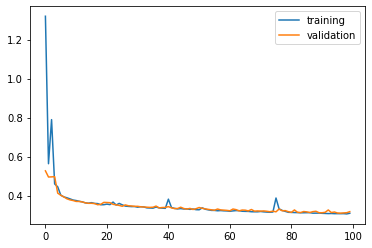

In [15]:
plt.plot(history.history['loss'], label = "training")
plt.plot(history.history['val_loss'], label = "validation")
plt.legend()
plt.show()

In [16]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 927us/step - loss: 0.3447


0.3446744680404663

In [ ]:
model.save("my_model.h5")